In [113]:
import matplotlib.pyplot as plt
import numpy as np

from PLA import sign

def read_data(file: str) -> np.ndarray:
    D = []
    with open(file) as f:
        for line in f:
            data = line.strip('\n').split(' ')
            x = [1]
            for entry in data:
                if '\t' in entry:
                    _data = entry.split('\t')
                    x.append(float(_data[0]))
                    x.append(float(_data[1]))
                else:
                    x.append(float(entry))
            D.append(x)
    return np.array(D)

def PLA(X: list, Y: list, eta: float = 1.0):
    counter = 0
    # one dummy dimension (4 + 1)
    w = np.array([0] * len(X[0]))
    while True:
        update = False
        for (x, y) in zip(X, Y):
            if sign(np.dot(w, x)) != y:
                update = True
                w = w + eta * y * np.array(x)
                print('w:', w)
                # break
        if not update:
            print('No more updates! w:', w)
            break
        counter += 1
    return (w, counter)


# data = read_data('./hw1.dat')
# data = data[:, (1,2,5)]
# data

data = np.array([
    # [1, 5, 1],
    # [1.5, 3, 1],
    # [2, 1, 1],
    # [3, 4.5, 1],
    # [4, 3, 1],
    # [4, 1.8, -1],
    # [5.5, 2.3, -1],
    # [6.4, 0.8, -1],
    # [9, 4, -1],
    # [9, 7, -1],
    [1, 1, 1],
    [2, 1, 1],
    [3, 1, 1],
    [1, 2, -1],
    [2, 2, -1],
    [3, 2, -1]
], dtype=float)

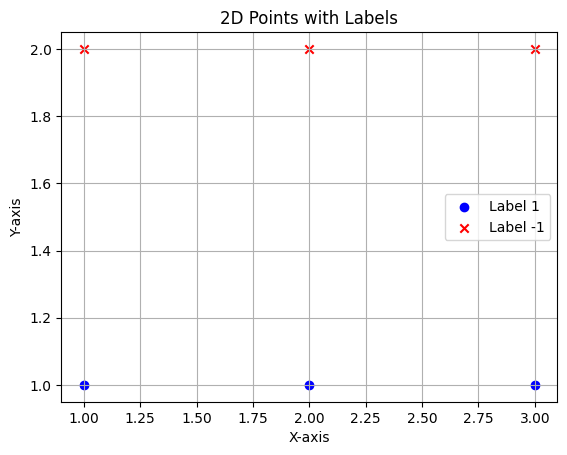

In [114]:
# Separate the points by labels
points_label_1 = data[data[:, 2] == 1]
points_label_minus_1 = data[data[:, 2] == -1]

# Plotting
plt.scatter(points_label_1[:, 0], points_label_1[:, 1], color='blue', label='Label 1', marker='o')
plt.scatter(points_label_minus_1[:, 0], points_label_minus_1[:, 1], color='red', label='Label -1', marker='x')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Points with Labels')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [115]:
X = []
for (id, row) in enumerate(data[:, :-1]):
    X.append(np.insert(row, 0, 1))
Y = data[:, -1]
X
w, cnt = PLA(X, Y, 1.0)

w: [1. 1. 1.]
w: [ 0.  0. -1.]
w: [1. 1. 0.]
w: [ 0.  0. -2.]
w: [ 1.  1. -1.]
w: [ 0. -1. -3.]
w: [ 1.  0. -2.]
w: [ 2.  2. -1.]
w: [ 1.  1. -3.]
w: [ 2.  2. -2.]
w: [ 1.  0. -4.]
w: [ 2.  1. -3.]
w: [ 3.  2. -2.]
w: [ 2.  1. -4.]
w: [ 3.  2. -3.]
w: [ 2.  0. -5.]
w: [ 3.  1. -4.]
w: [ 4.  2. -3.]
w: [ 3.  0. -5.]
w: [ 4.  1. -4.]
No more updates! w: [ 4.  1. -4.]


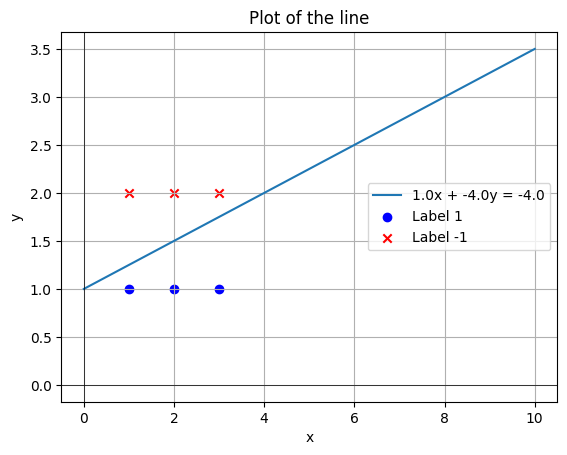

In [116]:
import matplotlib.pyplot as plt
import numpy as np

def plot_line(a, b, c):
    # Define the range for x
    x = np.linspace(0, 10, 400)
    
    # Calculate y based on the line equation ax + by = c
    y = (c - a * x) / b
    
    # Plot the line
    plt.plot(x, y, label=f'{a}x + {b}y = {c}')

    plt.scatter(points_label_1[:, 0], points_label_1[:, 1], color='blue', label='Label 1', marker='o')
    plt.scatter(points_label_minus_1[:, 0], points_label_minus_1[:, 1], color='red', label='Label -1', marker='x')

    
    # Set labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of the line')
    
    # Show legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

# Example usage with a=2, b=3, c=6
plot_line(w[1], w[2], -w[0])


w: [1. 1. 1.]


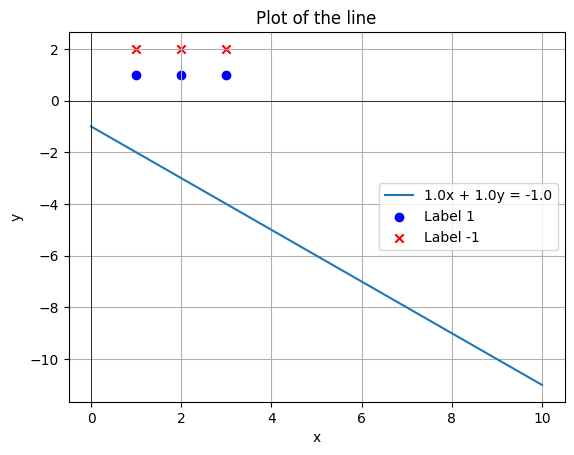

w: [ 0.  0. -1.]


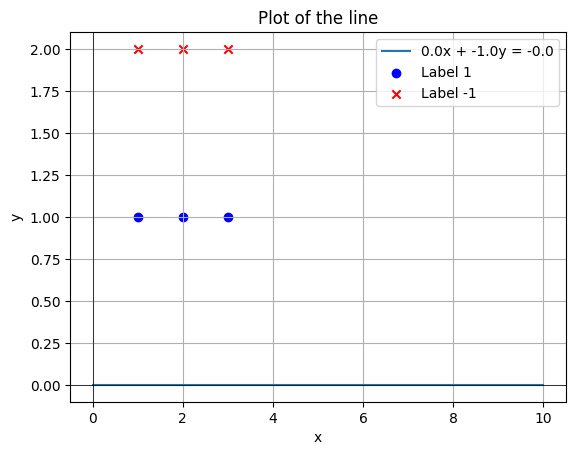

w: [1. 1. 0.]


C:\Users\User\AppData\Local\Temp\ipykernel_10044\3791589370.py:9: RuntimeWarning: divide by zero encountered in divide
  y = (c - a * x) / b


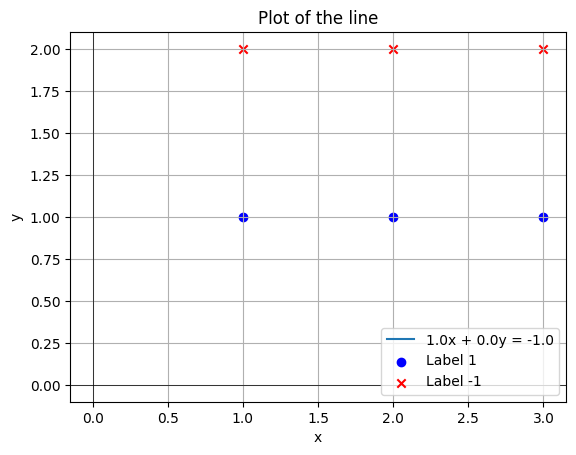

w: [ 0.  0. -2.]


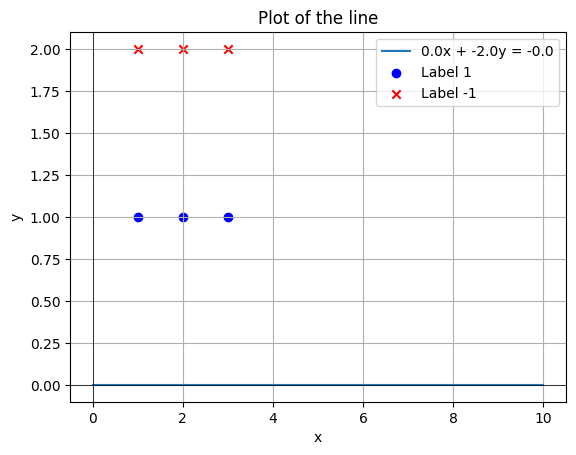

w: [ 1.  1. -1.]


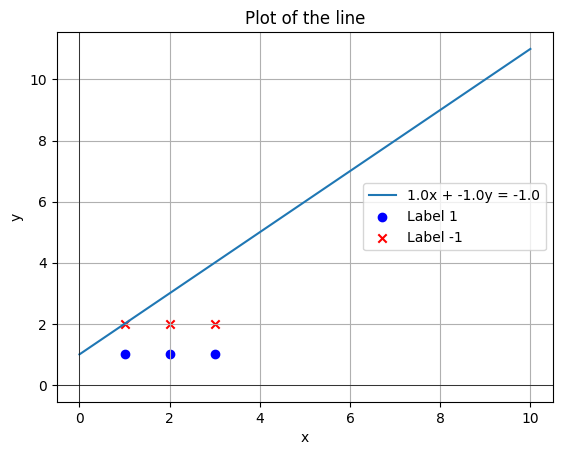

w: [ 0. -1. -3.]


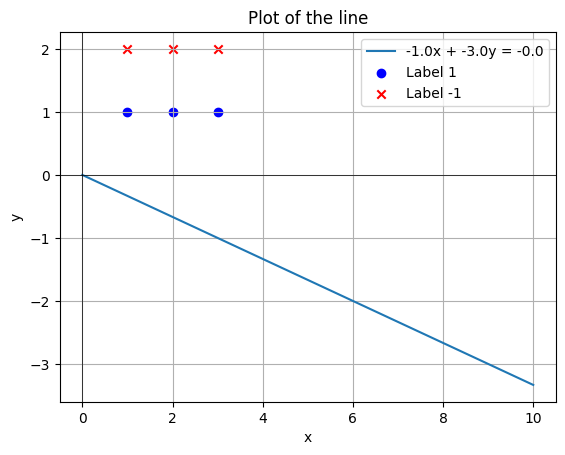

w: [ 1.  0. -2.]


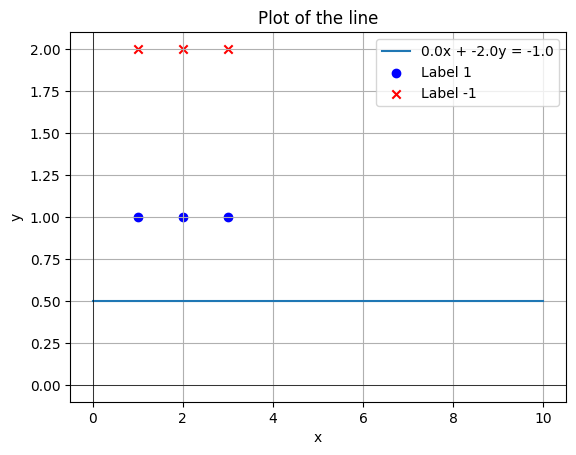

w: [ 2.  2. -1.]


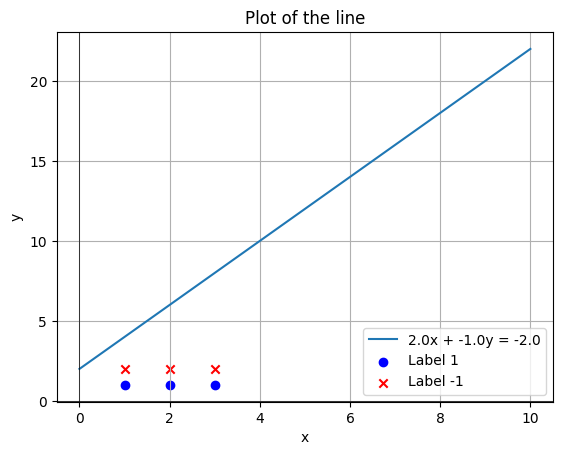

w: [ 1.  1. -3.]


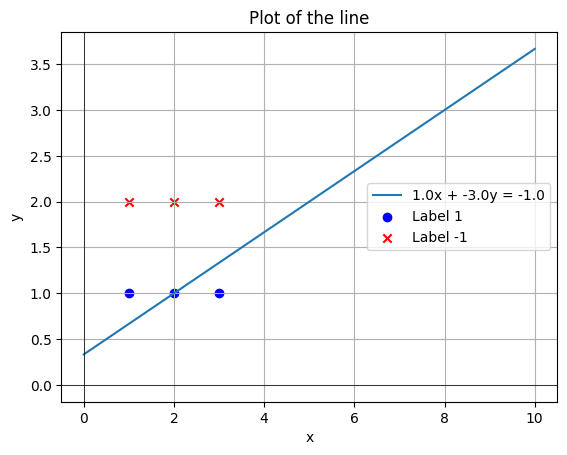

w: [ 2.  2. -2.]


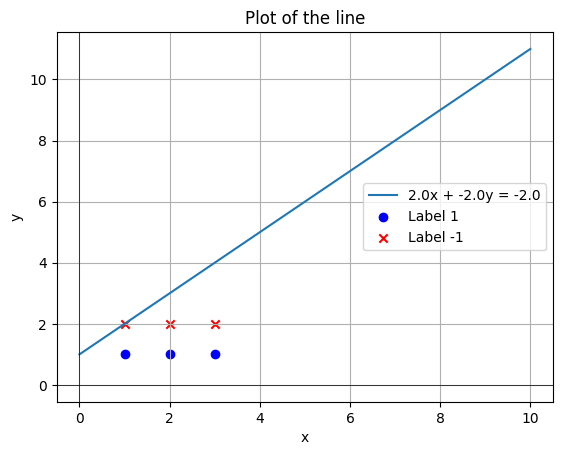

w: [ 1.  0. -4.]


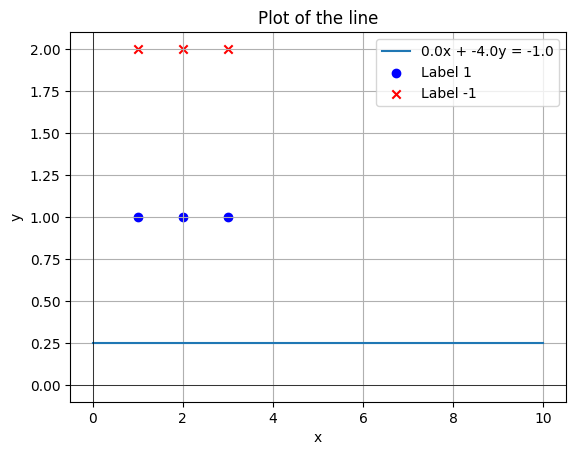

w: [ 2.  1. -3.]


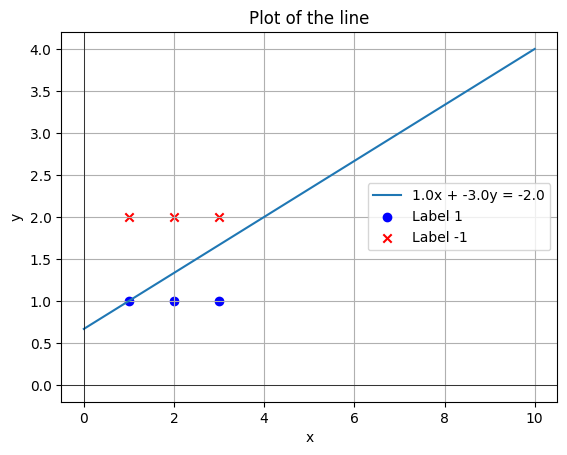

w: [ 3.  2. -2.]


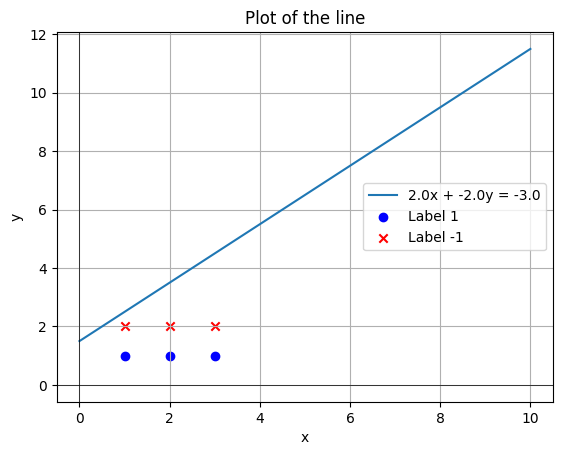

w: [ 2.  1. -4.]


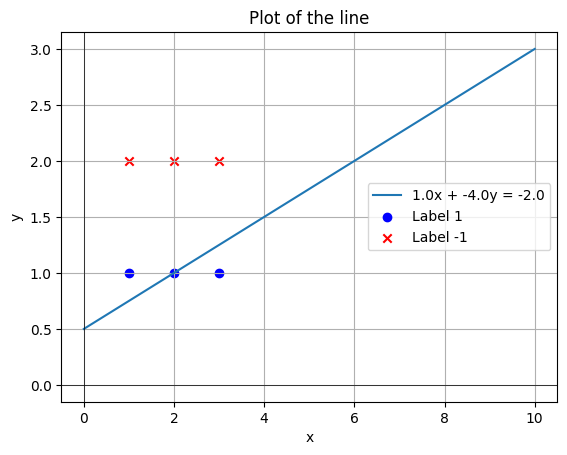

w: [ 3.  2. -3.]


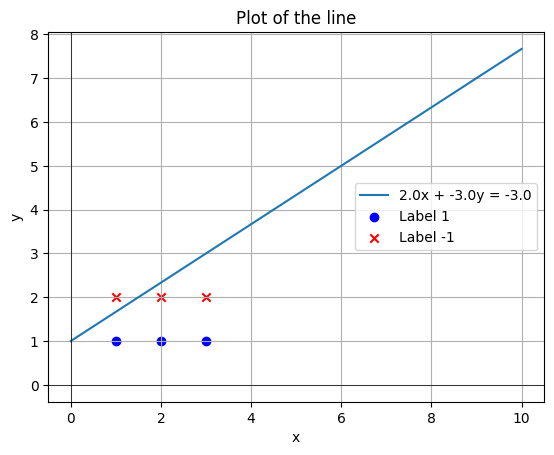

w: [ 2.  0. -5.]


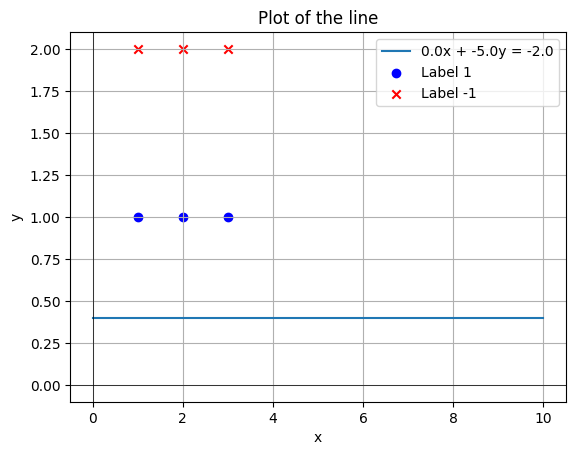

w: [ 3.  1. -4.]


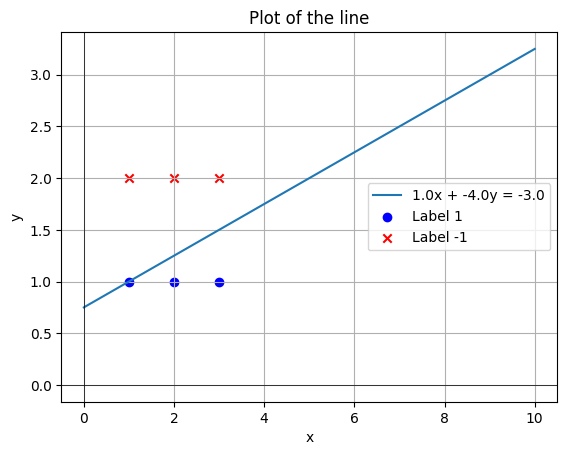

w: [ 4.  2. -3.]


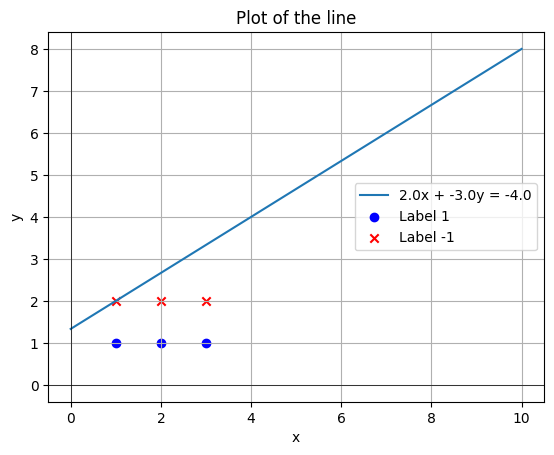

w: [ 3.  0. -5.]


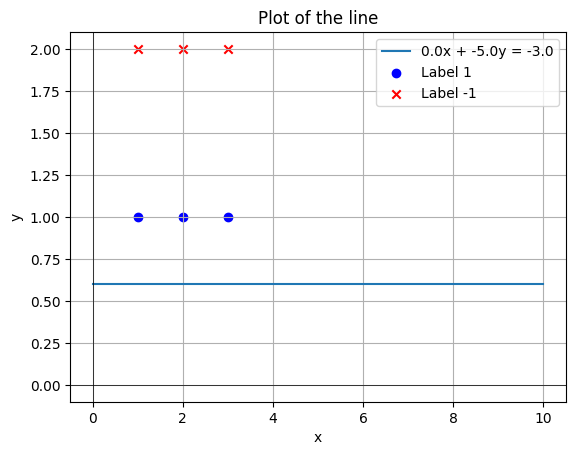

w: [ 4.  1. -4.]


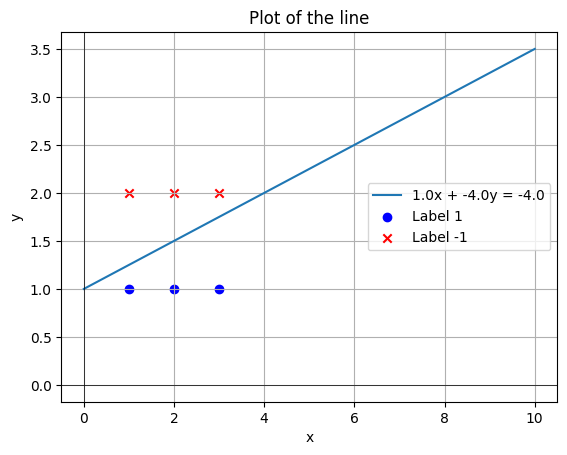

No more updates! w: [ 4.  1. -4.]


In [117]:
counter = 0
# one dummy dimension (4 + 1)
w = np.array([0] * len(X[0]))
while True:
    update = False
    for (x, y) in zip(X, Y):
        if sign(np.dot(w, x)) != y:
            update = True
            w = w + y * np.array(x)
            print('w:', w)

            plot_line(w[1], w[2], -w[0])
            # break
    if not update:
        print('No more updates! w:', w)
        break
    counter += 1

In [118]:
a = [1, 2, 3]
b = a
b[0] = -1
a

[-1, 2, 3]